In [1]:
from elasticsearch import Elasticsearch

# ÈÄ£Êé• ElasticsearchÔºàÁÑ°ÈúÄÂ∏≥ËôüÂØÜÁ¢ºÔºâ
es = Elasticsearch("http://localhost:9200")

# Ê∏¨Ë©¶ÈÄ£Á∑ö
if es.ping():
    print("‚úÖ ÊàêÂäüÈÄ£Êé• Elasticsearch")
else:
    print("‚ùå ÈÄ£Êé•Â§±Êïó")


‚úÖ ÊàêÂäüÈÄ£Êé• Elasticsearch


In [2]:
index_name = "ig_data"

# Â¶ÇÊûúÁ¥¢ÂºïÂ∑≤Á∂ìÂ≠òÂú®ÔºåÂâáÂà™Èô§‰∏¶ÈáçÊñ∞Âª∫Á´ã
if es.indices.exists(index=index_name):
    es.indices.delete(index=index_name)

es.indices.create(index=index_name, body={
    "settings": {
        "number_of_shards": 1,
        "number_of_replicas": 0
    },
    "mappings": {
        "properties": {
            "content": {"type": "text"},
            "creation_timestamp": {"type": "date"}
        }
    }
})

print(f"‚úÖ Á¥¢Âºï '{index_name}' Â∑≤Âª∫Á´ã")


‚úÖ Á¥¢Âºï 'ig_data' Â∑≤Âª∫Á´ã


In [3]:
import json
json_file='ig_data.json'

# ÂÅáË®≠‰Ω†ÁöÑ JSON Ê™îÊ°àÂêçÁ®±ÁÇ∫ 'account_information.json'
with open(json_file, 'r', encoding='utf-8') as f:
    data = json.load(f)

In [4]:
import datetime


for i in data:
    # Ë¶ÅÊèíÂÖ•ÁöÑÊñáÊú¨Ë≥áÊñô
    doc={}
    # ËÆÄÂèñdataË≥áÊñô
    doc["content"]=i["title"]
    doc["datetime"]=i["creation_timestamp"]
    doc["timestamp"]=datetime.datetime.now()
    doc["media"]=i["media"]

    # ÊèíÂÖ•Êñá‰ª∂ÔºàElasticsearch ÊúÉËá™ÂãïÁîüÊàê IDÔºâ
    res = es.index(index=index_name, body=doc)
    print(f"‚úÖ ÊñáÊú¨Â∑≤ÂØ´ÂÖ•ÔºåID: {res['_id']}")




‚úÖ ÊñáÊú¨Â∑≤ÂØ´ÂÖ•ÔºåID: YaBiLJUBGZI-6PgSnOVh
‚úÖ ÊñáÊú¨Â∑≤ÂØ´ÂÖ•ÔºåID: YqBiLJUBGZI-6PgSnOWb
‚úÖ ÊñáÊú¨Â∑≤ÂØ´ÂÖ•ÔºåID: Y6BiLJUBGZI-6PgSnOWf
‚úÖ ÊñáÊú¨Â∑≤ÂØ´ÂÖ•ÔºåID: ZKBiLJUBGZI-6PgSnOWi
‚úÖ ÊñáÊú¨Â∑≤ÂØ´ÂÖ•ÔºåID: ZaBiLJUBGZI-6PgSnOWl
‚úÖ ÊñáÊú¨Â∑≤ÂØ´ÂÖ•ÔºåID: ZqBiLJUBGZI-6PgSnOWn
‚úÖ ÊñáÊú¨Â∑≤ÂØ´ÂÖ•ÔºåID: Z6BiLJUBGZI-6PgSnOXC
‚úÖ ÊñáÊú¨Â∑≤ÂØ´ÂÖ•ÔºåID: aKBiLJUBGZI-6PgSnOXF
‚úÖ ÊñáÊú¨Â∑≤ÂØ´ÂÖ•ÔºåID: aaBiLJUBGZI-6PgSnOXI
‚úÖ ÊñáÊú¨Â∑≤ÂØ´ÂÖ•ÔºåID: aqBiLJUBGZI-6PgSnOXK
‚úÖ ÊñáÊú¨Â∑≤ÂØ´ÂÖ•ÔºåID: a6BiLJUBGZI-6PgSnOXM
‚úÖ ÊñáÊú¨Â∑≤ÂØ´ÂÖ•ÔºåID: bKBiLJUBGZI-6PgSnOXO
‚úÖ ÊñáÊú¨Â∑≤ÂØ´ÂÖ•ÔºåID: baBiLJUBGZI-6PgSnOXQ
‚úÖ ÊñáÊú¨Â∑≤ÂØ´ÂÖ•ÔºåID: bqBiLJUBGZI-6PgSnOXS
‚úÖ ÊñáÊú¨Â∑≤ÂØ´ÂÖ•ÔºåID: b6BiLJUBGZI-6PgSnOXU
‚úÖ ÊñáÊú¨Â∑≤ÂØ´ÂÖ•ÔºåID: cKBiLJUBGZI-6PgSnOXW
‚úÖ ÊñáÊú¨Â∑≤ÂØ´ÂÖ•ÔºåID: caBiLJUBGZI-6PgSnOXY
‚úÖ ÊñáÊú¨Â∑≤ÂØ´ÂÖ•ÔºåID: cqBiLJUBGZI-6PgSnOXa
‚úÖ ÊñáÊú¨Â∑≤ÂØ´ÂÖ•ÔºåID: c6BiLJUBGZI-6PgSnOXc
‚úÖ ÊñáÊú¨Â∑≤ÂØ´ÂÖ•ÔºåID: dKBiLJUBGZI-6PgSnOXe
‚úÖ ÊñáÊú¨Â∑≤ÂØ´ÂÖ•ÔºåID: daBiLJUBGZI-6PgSnOXg
‚úÖ ÊñáÊú¨Â∑≤

In [ ]:
# es.indices.delete(index=index_name)
# print(f"üóëÔ∏è Á¥¢Âºï '{index_name}' Â∑≤Âà™Èô§")


üóëÔ∏è Á¥¢Âºï 'ig_data' Â∑≤Âà™Èô§


In [5]:
query = {
    "query": {
        "match": {
            "content": "È∫µ"
        }
    }
}

response = es.search(index=index_name, body=query)

for hit in response["hits"]["hits"]:
    print(hit['_id'])

# print(response["hits"]["hits"])

# print("üîç ÊêúÁ¥¢ÁµêÊûúÔºö")
# for hit in response["hits"]["hits"]:
#     print(f"üìÑ {hit['_source']['content']} (ID: {hit['_id']})")


_aBiLJUBGZI-6PgSoedl
F6BiLJUBGZI-6PgSn-fF
qaBiLJUBGZI-6PgSn-YR
IaBiLJUBGZI-6PgSnuYI
HaBiLJUBGZI-6PgSnuYC
AKBiLJUBGZI-6PgSn-ej
4aBiLJUBGZI-6PgSneWl
zqBiLJUBGZI-6PgSn-ZT
56BiLJUBGZI-6PgSn-Z9
tqBiLJUBGZI-6PgSneVa


In [6]:
post=response["hits"]["hits"][0]
print(post['_id'])
print(post['_source']['content'])
print(post['_source']['datetime'])
for i in post['_source']['media']:
    print(i['uri'])

_aBiLJUBGZI-6PgSoedl
üö©Âè∞ÂåóÂÖßÊπñ
ÊãâÈ∫µÈÇÑÊòØÂÖßÁî®ÊúÄÂ•ΩÂêÉüòã
ÊüöÈ¶ôÊãâÈ∫µÈÖ∏ÁîúÊ∏ÖÁàΩ
ÂíñÂñ±ÊãâÈ∫µÊøÉÈÉÅÊ∏æÂéö
ÂêÉÂÆåË∫´ÂøÉÈùàÊªøË∂≥ÔΩûÔΩûÔΩû
ÂÉπÊ†ºÔºö
ÊüöÈ¶ôÂèâÁáíÊãâÈ∫µ120
ÂíñÂñ±ÂèâÁáíÊãâÈ∫µ180
2021-08-16T00:30:39
media/posts/202108/236651352_247873327186457_7381910403274127878_n_17979810082401262.jpg
media/posts/202108/236463251_646383776336170_2212110138996666204_n_17901731651157121.jpg
media/posts/202108/238486062_1059323688134669_2760373052395147696_n_17911562848975539.jpg


In [8]:
# ËÆÄÂèñÂúñÁâáË∑ØÂæëÔºåÂ≠òÈÄ≤Ê∏ÖÂñÆÔºàÂÖàÁ¢∫Ë™ç 'media' Ê¨Ñ‰ΩçÂ≠òÂú®‰∏î‰∏çÁÇ∫Á©∫Ôºâ
image_list = []
media = post["_source"].get('media', [])
if media:
    for item in media:
        # ÂÅáË®≠ÊØèÂÄã item ÂÖßÊúâ 'uri' Ê¨Ñ‰Ωç
        image_path = '../' + item.get('uri', '')
        image_list.append(image_path)

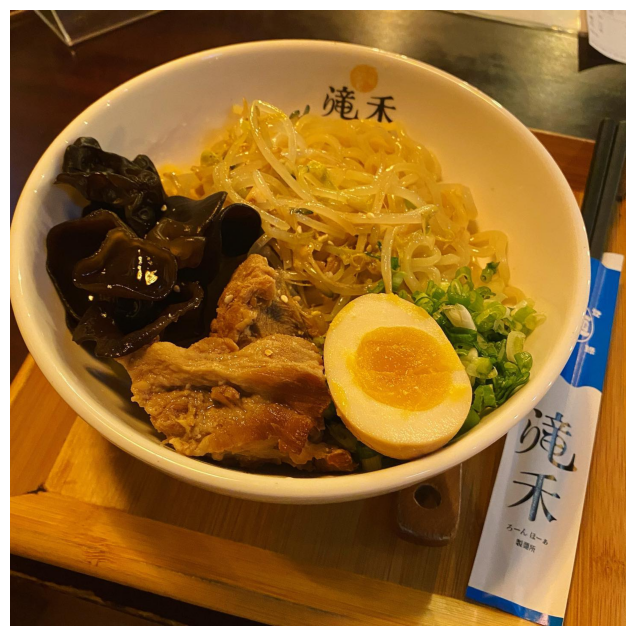

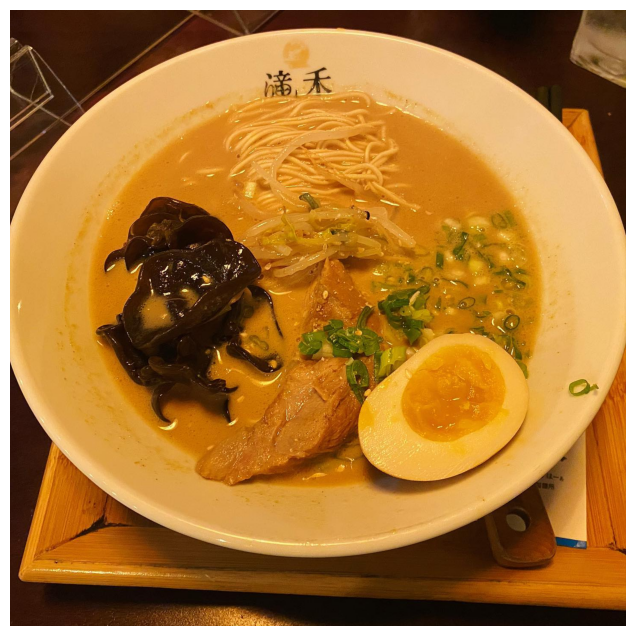

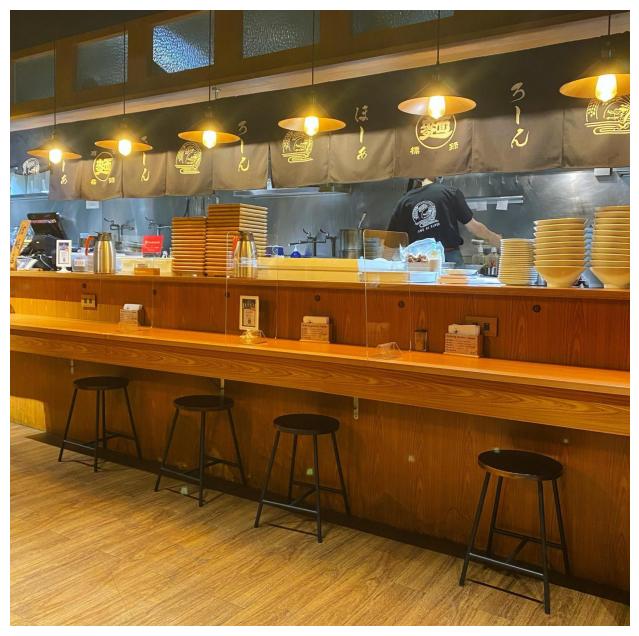

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in image_list:

    # ËÆÄÂèñÂΩ±ÂÉèÊ™îÊ°à
    img = mpimg.imread(i)

    # Ë®≠ÂÆöÂúñÁâáÂ§ßÂ∞è
    plt.figure(figsize=(10, 8))

    # È°ØÁ§∫ÂúñÁâá
    plt.imshow(img)
    plt.axis('off')  # ÈóúÈñâÂ∫ßÊ®ôËª∏
    plt.show()